# ANN

In [ ]:
# Artificial neural network using Tensor Flow and keras
# Use-case = Linear

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("C:\\Users\\Sandeep\\OneDrive\\Desktop\\Classes and Files\\Salary_Data.csv")

In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
df.isnull().sum()

YearsExperience    1
Salary             1
dtype: int64

In [14]:
df.dropna(inplace = True)

In [15]:
df.shape

(30, 2)

In [19]:
X = df.iloc[:,[0]].values
y = df.iloc[:,[1]].values

In [25]:
stdsc1 = StandardScaler()
X_scaled = stdsc1.fit_transform(X)

In [30]:
minmax1 = MinMaxScaler()
y_scaled = minmax1.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, train_size = 0.8, random_state =123)

In [36]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (24, 1)
y_train (24, 1)
X_test (6, 1)
y_test (6, 1)


# Model Architecture

In [37]:
model = tf.keras.models.Sequential()

In [39]:
# hidden layer 1 | units = nodes in hidden layer | input shape = nodes in input layer/no. of features 

model.add(tf.keras.layers.Dense(units = 5, activation = 'relu', input_shape = (1,) ))

# hidden layer 2

model.add(tf.keras.layers.Dense(units = 4, activation = 'relu' ))

# output layer

model.add(tf.keras.layers.Dense(units = 1, activation = 'linear' ))

## Compiling the model

In [41]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

### Fit the model

In [51]:
model_history = model.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test))

Epoch 1/500
1/1 [==============================] - 0s 58ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 2/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 3/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 5/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 6/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 7/500
1/1 [=======================

In [52]:
model_history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

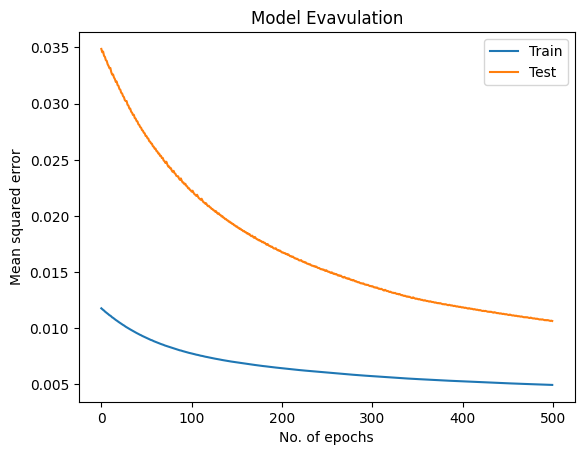

In [61]:
plt.plot(model_history.history['mean_squared_error'])
plt.plot(model_history.history['val_mean_squared_error'])
plt.title("Model Evavulation")
plt.xlabel("No. of epochs")
plt.ylabel("Mean squared error")
plt.legend(['Train','Test'], loc = 'upper right')